In [ ]:
!nvidia-smi

Sat Aug 31 17:10:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 15.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!yolo task=segment mode=predict model=yolov8x-seg.pt conf=0.25 source='/content/drive/MyDrive/Colab_Notebooks/yolo tutorial/gratisography-cyber-kitty-1170x780.jpg'

100% 137M/137M [00:00<00:00, 184MB/s]
Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,797,696 parameters, 0 gradients, 344.1 GFLOPs

image 1/1 /content/drive/MyDrive/Colab_Notebooks/yolo tutorial/gratisography-cyber-kitty-1170x780.jpg: 448x640 1 cat, 1 tie, 1 bed, 120.7ms
Speed: 12.8ms preprocess, 120.7ms inference, 1178.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


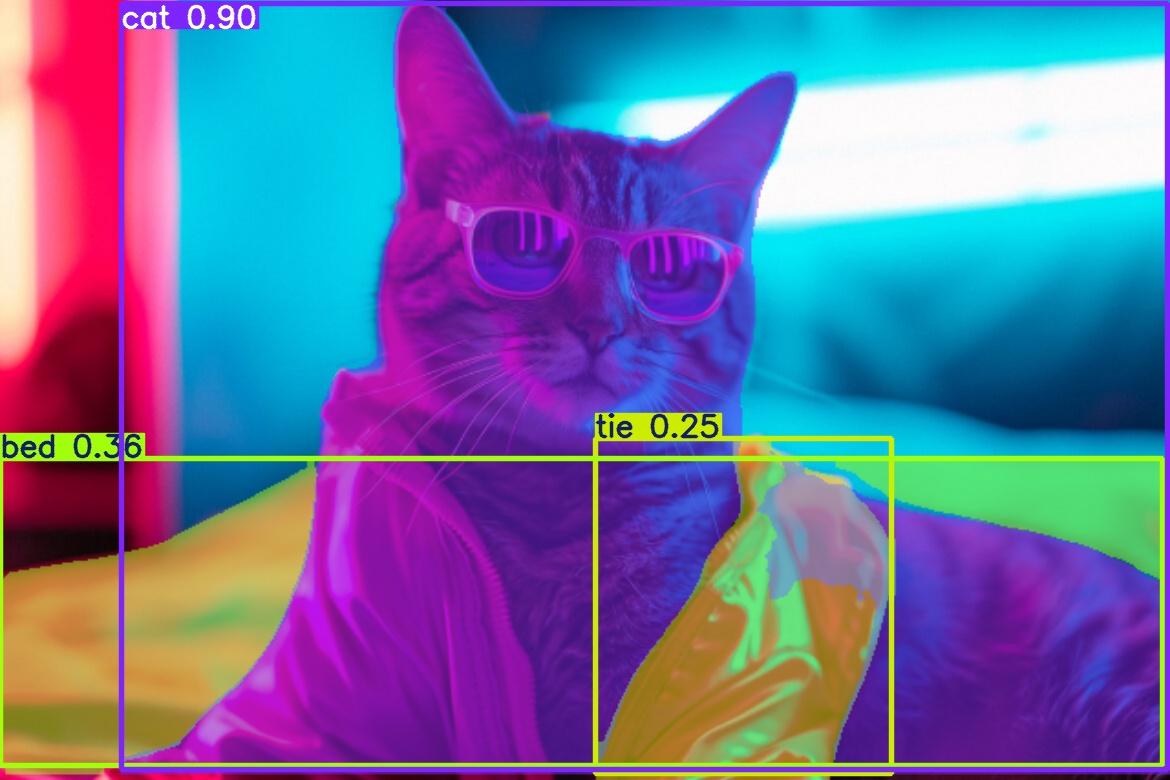

In [ ]:
Image(filename="/content/runs/segment/predict/gratisography-cyber-kitty-1170x780.jpg",width=600)

In [ ]:
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/drive/MyDrive/Colab_Notebooks/yolo tutorial/gratisography-cyber-kitty-1170x780.jpg'

100% 22.8M/22.8M [00:00<00:00, 40.8MB/s]
Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

image 1/1 /content/drive/MyDrive/Colab_Notebooks/yolo tutorial/gratisography-cyber-kitty-1170x780.jpg: 448x640 2 cats, 1 bed, 47.6ms
Speed: 2.3ms preprocess, 47.6ms inference, 550.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


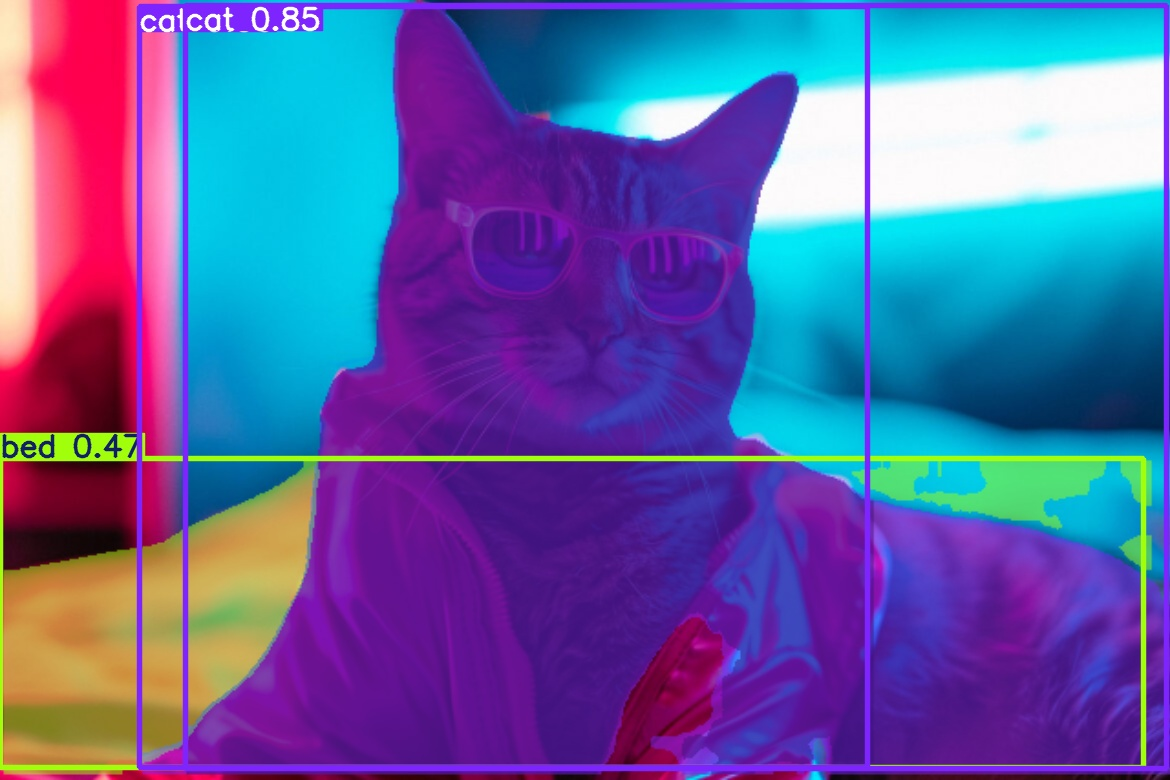

In [ ]:
Image(filename="/content/runs/segment/predict2/gratisography-cyber-kitty-1170x780.jpg",width=600)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eSCang8WY4Z1vQlZeH9h")
project = rf.workspace("minor-project-2-qrehi").project("coral_segmentation-wdpo7")
version = project.version(9)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.84, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Coral_Segmentation-9 in yolov8:: 100%|██████████| 3120/3120 [00:00<00:00, 8401.29it/s]


In [ ]:
!yolo task=segment mode=train model=yolov8m-seg.pt data=/content/Coral_Segmentation-9/data.yaml epochs=25 imgsz=640

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/Coral_Segmentation-9/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [ ]:
!ls {HOME}/runs/segment/train2/

args.yaml					    MaskF1_curve.png	 train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1725124717.fea7a7bdebe9.3048.0  train_batch1170.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1171.jpg  weights
labels.jpg					    train_batch1172.jpg


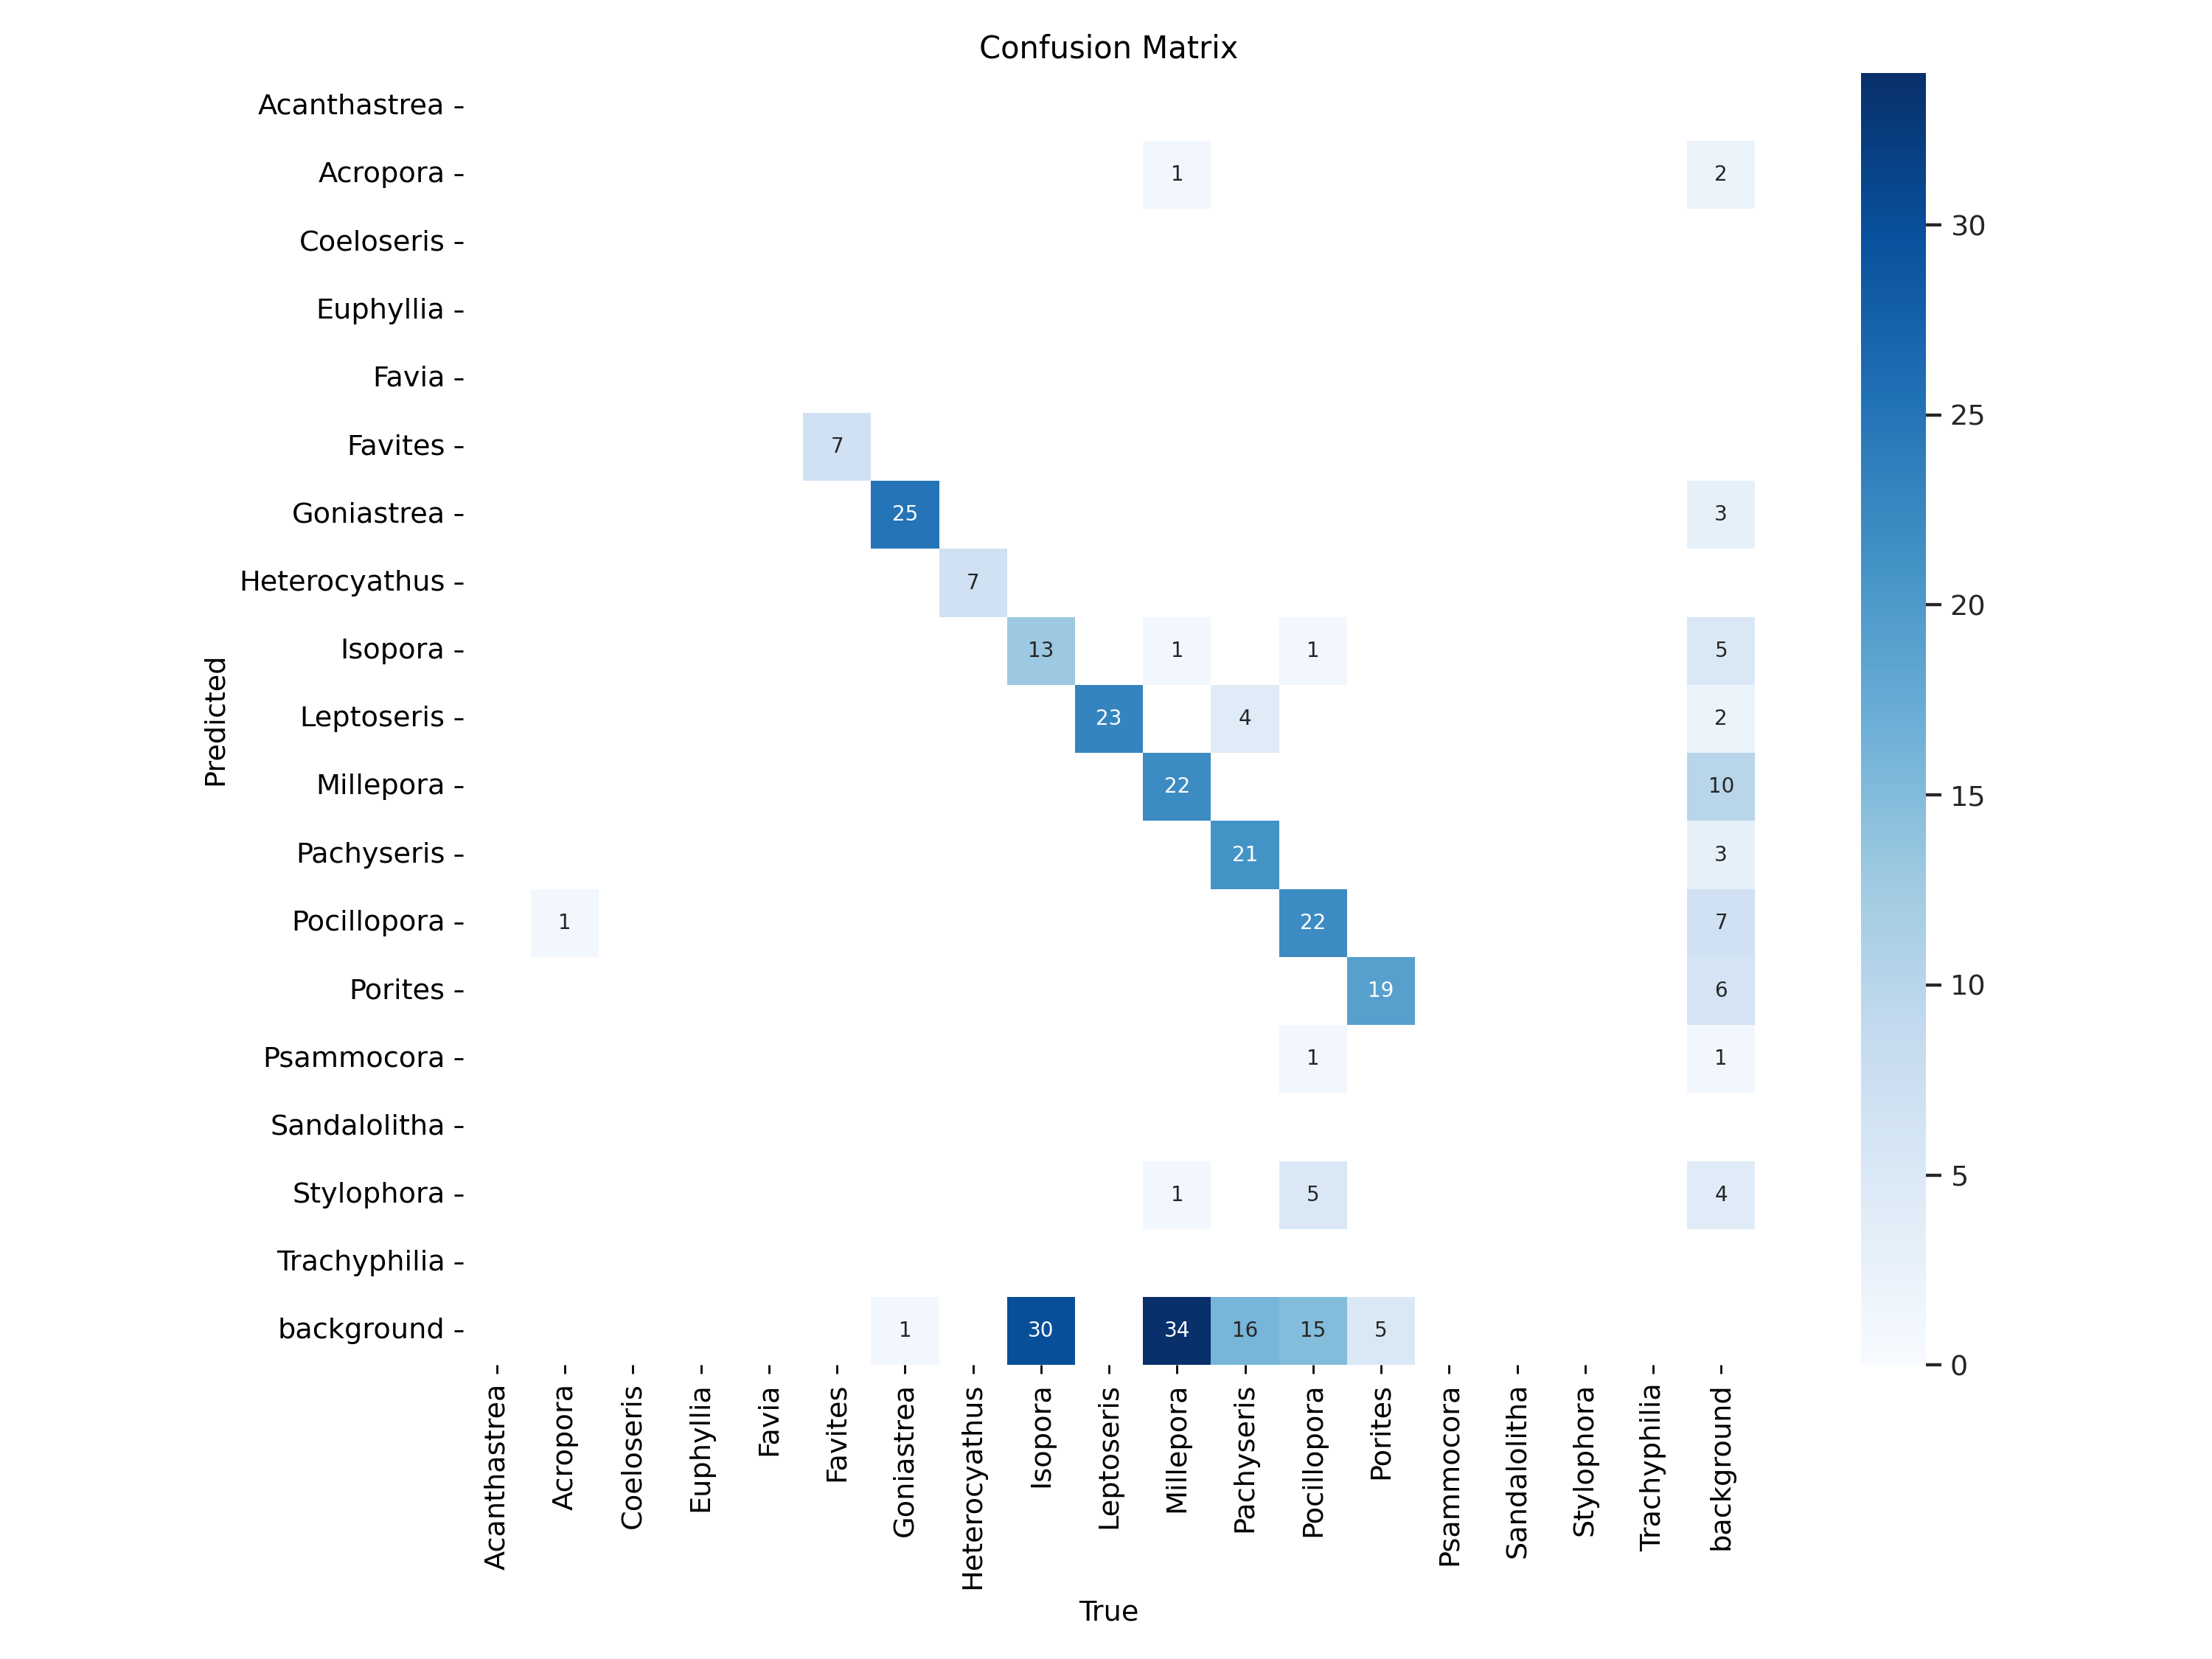

In [ ]:
Image(filename='/content/runs/segment/train2/confusion_matrix.png',width=600)

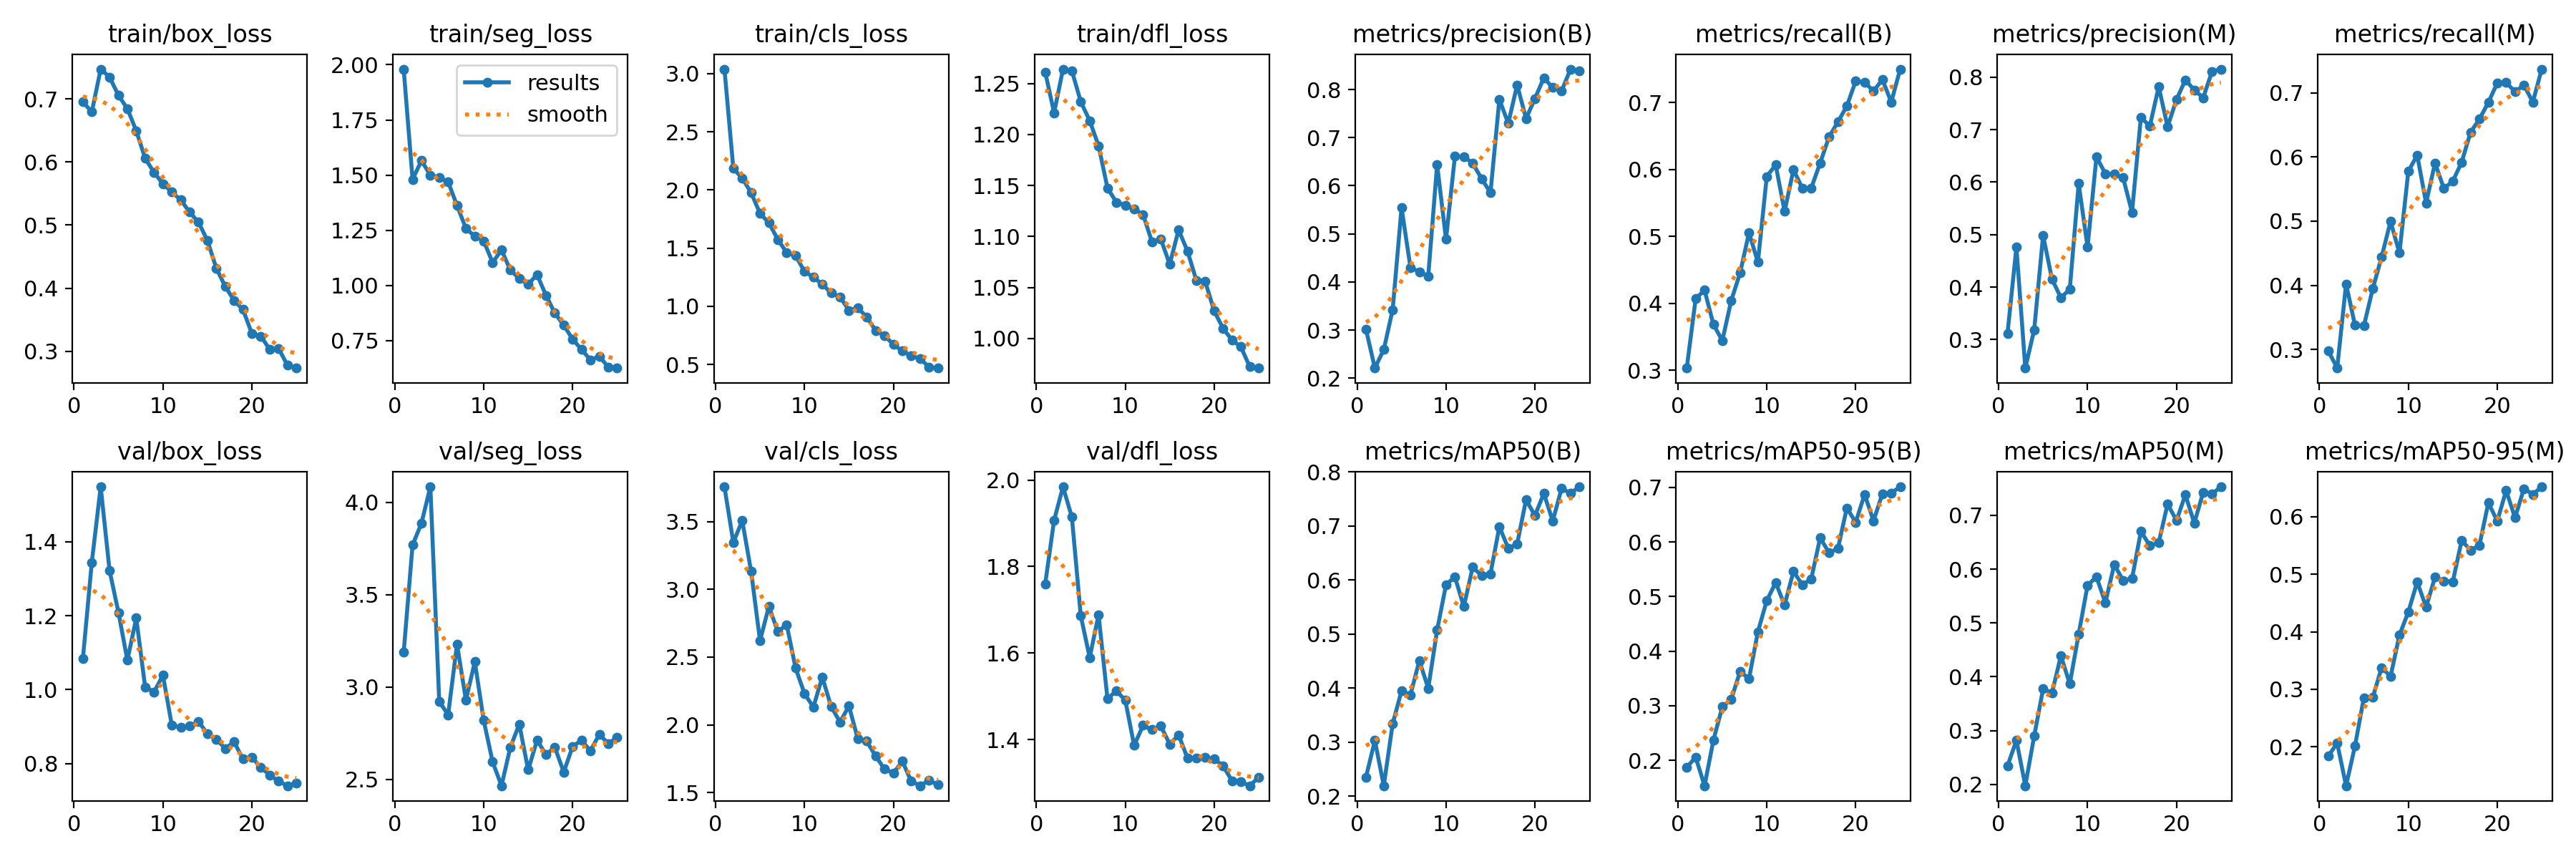

In [ ]:
Image(filename="/content/runs/segment/train2/results.png",width=600)

In [ ]:
!yolo task=segment mode=val model=/content/runs/segment/train2/weights/best.pt data=/content/Coral_Segmentation-9/data.yaml

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,232,806 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/Coral_Segmentation-9/valid/labels.cache... 156 images, 0 backgrounds, 0 corrupt: 100% 156/156 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 10/10 [00:08<00:00,  1.17it/s]
                   all        156        275       0.84       0.75      0.772      0.701      0.815      0.737      0.753      0.652
              Acropora          1          1      0.399          1      0.995      0.995      0.398          1      0.995      0.895
               Favites          7          7      0.994          1      0.995      0.946      0.993          1      0.995        0.9
            Goniastrea         19         26      0.887      0.923      0.936      0.862      0.886      0.923      0.93

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train2/weights/best.pt conf=0.25 source=/content/Coral_Segmentation-9/test/images

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,232,806 parameters, 0 gradients, 110.0 GFLOPs

image 1/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.027dd4e7bd5b74b709cc8ad26b872a82.jpg: 640x640 1 Acanthastrea, 45.9ms
image 2/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.214140c8a4a24a6a64beade79414f0c2.jpg: 640x640 1 Psammocora, 45.8ms
image 3/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.4e78d18088822a64896902f942317acc.jpg: 640x640 1 Favites, 45.7ms
image 4/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.575469d0cad41fc40b03cb87370ee6dd.jpg: 640x640 1 Acropora, 45.7ms
image 5/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.b1059e1a98a3413350bbd8e288f62cc7.jpg: 640x640 1 Coeloseris, 36.6ms
image 6/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.f1f873e7b82d0b301312ddb1c97f9498.jpg: 640x640 1 Stylophora, 26.0ms
ima

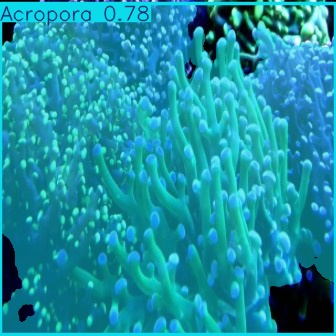

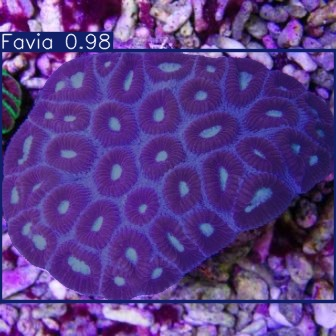

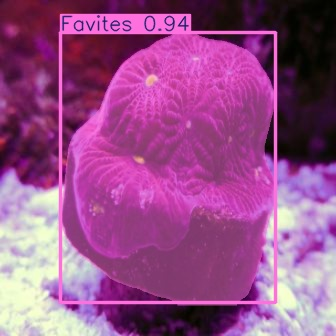

In [ ]:
import glob

for image_path in glob.glob("/content/runs/segment/predict3/*.jpg")[:3]:
  display(Image(filename=image_path,width=600))
  print("\n")